# Testing nbodykit
Oct 30, 2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from scipy.interpolate import InterpolatedUnivariateSpline

from nbodykit.lab import *
from nbodykit import setup_logging, style

import time
import os

ModuleNotFoundError: No module named 'nbodykit'

In [2]:
%matplotlib inline

In [31]:
### 2D images

fname='/mnt/laptop/data/2d_images_50.npy'
a1=np.load(fname)[:,:,:,0]
print(a1.shape)
img=a1[:,:16,:16]

img.shape

(50, 512, 512)


(50, 16, 16)

In [6]:
def f_make_catalog_2d(img):
    ''' Make catalog for 2d images'''
    x=np.arange(img.shape[0]) 
    y=np.arange(img.shape[1])

    coord=np.array([(i,j,0) for i in x for j in y]) ## Form is (x,y,0)

    ip_dict={}
    ip_dict['Position'] = coord
    ip_dict['Mass'] = img.flatten()
#     ip_dict['Weight'] = img.flatten()


    catalog=ArrayCatalog(ip_dict)
    
    return catalog

def f_make_catalog_3d(img):
    
    x=np.arange(img.shape[0]) 
    y=np.arange(img.shape[1])
    z=np.arange(img.shape[2])

    coord=np.array([(i,j,k) for i in x for j in y for k in z]) ## Form is (x,y,z)

    ip_dict={}
    ip_dict['Position'] = coord
    ip_dict['Mass'] = img.flatten()
#     ip_dict['Weight'] = img.flatten()


    catalog=ArrayCatalog(ip_dict)
    
    return catalog



In [7]:
cat1=f_make_catalog_2d(img[0])
cat2=f_make_catalog_2d(img[1])

print(cat1.csize,cat1.columns)


256 ['Mass', 'Position', 'Selection', 'Value', 'Weight']


In [32]:
# ### 3D images
# fname='/mnt/laptop/data/3d_images_10.npy'
# arr_3d=np.load(fname,mmap_mode='r')[:10,:24,:24,:24]
# print(arr_3d.shape)

(10, 24, 24, 24)


In [35]:
if len(a1.shape)-1==2: 
    print("Image is 2d")
elif len(a1.shape)-1==3:
    print("Image is 3d")

Image is 2d


In [9]:
# cat1=f_make_catalog_3d(arr_3d[0])
# cat2=f_make_catalog_3d(arr_3d[1])

# print(cat1.csize,cat1.columns)

In [10]:
# cat3=f_make_catalog(np.ones((24,24,24)))

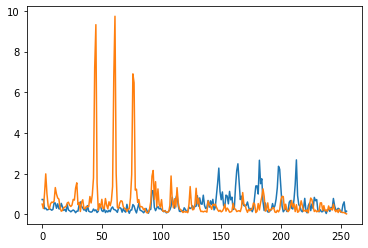

In [11]:
plt.figure()
plt.plot(cat1['Mass'])
plt.plot(cat2['Mass'])


### 3pt function
https://nbodykit.readthedocs.io/en/latest/api/_autosummary/nbodykit.algorithms.threeptcf.html?highlight=3PCF#nbodykit.algorithms.threeptcf.SimulationBox3PCF

In [20]:
t1=time.time()
obj1=SimulationBox3PCF(cat1,[1,2,3,4,5,6],edges=np.arange(1,10,1),BoxSize=20,weight='Mass')
t2=time.time()
op1=obj1.run()
t3=time.time()
print(t3-t2,t2-t1)


9.117322444915771 8.985998392105103


In [30]:
obj2=SimulationBox3PCF(cat2,[1,2,3,4],edges=np.arange(1,10,1),BoxSize=20,weight='Mass')
op2=obj2.run()

In [14]:
print(op2.coords['r1'],op2.coords['r2'])
print(op2.dims,op2.edges)
print(op2.variables)

[1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5] [1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5]
['r1', 'r2'] {'r1': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'r2': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}
['corr_1', 'corr_2', 'corr_3', 'corr_4']


In [23]:
# dir(op1)

In [26]:
for corr in op1.variables:
    print(corr,'\t',end='')
    print(op1[corr].shape,op2[corr].shape)
    print(np.trace(op1[corr]),np.trace(op2[corr]))

corr_1 	(8, 8) (8, 8)
498.27682148391295 2005.265542055914
corr_2 	(8, 8) (8, 8)
1291.9854474892418 4069.030916521952
corr_3 	(8, 8) (8, 8)
725.8846431343525 3486.4409335735204
corr_4 	(8, 8) (8, 8)
1444.9696224287622 5292.022118542029
corr_5 	

KeyError: '`corr_5` is not a valid variable name'

In [29]:
op1['corr_5']
print(op1['corr_5'].shape)

(8, 8)


In [18]:
op1['corr_1'],op1['corr_2']

(array([[  9.19769186,  13.41481978,  15.15189874,  21.39399816,
          13.00092881,   7.22812563,   2.45424901,  -0.47413061],
        [ 13.41481978,  37.95258806,  43.29444191,  50.98896438,
          31.32458396,  19.52384864,  11.54951503,   0.49001509],
        [ 15.15189874,  43.29444191,  58.8301609 ,  70.14016699,
          43.79098263,  29.59057834,  22.04106589,   7.82749756],
        [ 21.39399816,  50.98896438,  70.14016699, 105.34700677,
          71.09580614,  52.28956494,  44.69169292,  26.2454158 ],
        [ 13.00092881,  31.32458396,  43.79098263,  71.09580614,
          61.64884249,  51.76127833,  49.45857915,  37.32024388],
        [  7.22812563,  19.52384864,  29.59057834,  52.28956494,
          51.76127833,  57.70705335,  61.19068851,  51.6706869 ],
        [  2.45424901,  11.54951503,  22.04106589,  44.69169292,
          49.45857915,  61.19068851,  83.68390193,  73.8164147 ],
        [ -0.47413061,   0.49001509,   7.82749756,  26.2454158 ,
          37.32024

In [32]:
op2['corr_1']

array([[ 773529.36289127,  900803.83732078,  502517.65372782,
         422795.3570535 ,  215518.51695981,  174100.06836548,
         199506.47915425,  176732.79508305],
       [ 900803.83732078, 1988734.86274495, 1669318.84112628,
        1301259.96384098,  694824.89056427,  591731.46723281,
         472317.43816008,  331039.24236563],
       [ 502517.65372782, 1669318.84112628, 2410215.92371583,
        2580674.18183232, 1481948.84380983, 1044500.90049153,
         744518.39738627,  509636.51477973],
       [ 422795.3570535 , 1301259.96384098, 2580674.18183232,
        5047194.73928954, 3575888.20078003, 2325627.18552893,
        1675209.97344994, 1138667.41897026],
       [ 215518.51695981,  694824.89056427, 1481948.84380983,
        3575888.20078003, 4222967.77870352, 3552697.28138359,
        2464717.21472215, 1361580.78188351],
       [ 174100.06836548,  591731.46723281, 1044500.90049153,
        2325627.18552893, 3552697.28138359, 4509155.47632333,
        4013511.11311337, 22278

In [87]:
img_index=5

In [88]:
data_dir='data_stored_results/'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

In [89]:

for i in op1.variables:
    arr1=op1[i]
    fname='img'+str(img_index)+i+'.npy'
    np.savetxt(data_dir+fname,arr1)

In [92]:
ls data_stored_results/

In [93]:
    img_index=args.img_index
    fname=args.fname
    

'/mnt/laptop/notebooks'

In [ ]:
python get3pct.py --fname /mnt/laptop/data/2d_images_50.npy --img_index 0 -s 16